In [1]:
import numpy.random
import scipy
import scipy.optimize
import scipy.constants
import math
import numpy 
import uncertainties
import uncertainties.unumpy 

import matplotlib.axes
import matplotlib.pyplot
import scipy.misc
import scipy.special
import scipy.stats
from random import *
from scipy.special import xlogy
import sys
from scipy.stats import norm

import pandas as pd

from scipy.optimize import curve_fit


from math import *

from scipy.optimize import curve_fit

files = numpy.array([
    'runFile_GaAs.out',
    'runFile_HgCdTe.out',
    'runFile_InAsSb.out',
    'runFile_InAs.out',
    'runFile_InSbBi_5Bi.out',
    'runFile_InSbBi_05Bi.out',
    'runFile_InSb.out',
    'runFile_Si.out'])

nice_semiconductor_names = numpy.array(['$GaAs$' , '$Hg_{0.7}Cd_{0.3}Te$' , '$InAs_{0.91}Sb_{0.09}$' , '$InAs$' , '$InSb_{0.5}Bi_{0.5}$' , '$InSb_{0.95}Bi_{0.05}$' ,'InSb', '$Si$'])

import periodictable

from periodictable import elements as periodictable_elements

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import brewer2mpl

bmap = brewer2mpl.get_map('Paired', 'qualitative', 10)
colors = bmap.mpl_colors

import periodictable
from periodictable import elements as periodictable_elements


density_HgCdTe = 7.43 
density_GaAs = 5.31
density_InAsSb = 5.67945 
density_InSbBi_5Bi = 6.64
density_InSbBi_05Bi = 5.87
density_InSb = 5.77
density_Si = 2.33
density_InAs = 5.68

densities = [density_GaAs, density_HgCdTe, density_InAsSb, density_InAs, density_InSbBi_5Bi, density_InSbBi_05Bi, density_InSb, density_Si]


In [2]:
# FOR THIS ONE, THE FLUX WAS 10^12 per second and irradiation was conducted for 30 seconds
time = 30
flux = 10**12
total_fluence = time*flux
numParticles_fisp = total_fluence


# EXPERIMENT PARAMETERS

# in cm^3, 1cm x 1cm x 0.5 mm (0.05 cm)
volume = 1*1*0.05
chris_angle = 45*2*math.pi/360
numParticles_expr_100kRAD =  7.5*10**11
numParticles_expr_100kRAD_45deg =  7.5*10**11*math.cos(chris_angle)
CALC_convertToEXPR_100kRAD_perCM3 = (numParticles_expr_100kRAD/numParticles_fisp)/volume
CALC_convertToEXPR_100kRAD_perCM3_45edg = (numParticles_expr_100kRAD_45deg/numParticles_fisp)/volume
CALC_convertToEXPR_1MRAD_perCM3 = (numParticles_expr_100kRAD*10/numParticles_fisp)/volume


In [3]:

prefix = '/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/FINAL_FINAL_ALL_FISPACT_OUTPUT/ALL_LEOISS_Results/'
data = []
times_y = numpy.array([0,100./365,1,2,3,4,5,6,7,8,9,10])


for fileNum, filename in enumerate(files):
    print(filename)
    good = False
    counter = 0
    timeCounter = -1

    for line in open(prefix + filename):
        if line[0:32] == '   PROTON   FLUX DURING INTERVAL':
            #print(line)
            1
        if line[0] == '0':
            good = False
            counter = 0
        if line[0:33] == '0  INITIAL TOTAL MASS OF MATERIAL':
            print(float(line[34:(34+11)])/densities[fileNum], densities[fileNum],float(line[34:(34+11)])  )

        if good:
            counter = counter + 1
        if good and counter > 3:
            #print(line)
            elem = line[0:7]
            elem = ''.join(filter(str.isalpha, elem))
            good_data = [elem, float(line[14:25]), times_y[timeCounter], filename]
            #print(good_data)
            data.append(good_data)
        if line[0:21] == '1 * * * TIME INTERVAL':
            good = True
            timeCounter = timeCounter + 1


labels = ['Element', 'Count', 'Time_Years', 'Semiconductor']
composition = pd.DataFrame.from_records(data, columns=labels)   
composition_pivot = composition.pivot_table(index=['Semiconductor', 'Time_Years', 'Element'], values='Count', aggfunc=numpy.sum, fill_value=0)
composition_pivot.reset_index(inplace=True)

#Element	GaAs_Nuclides	HgCdTe_Nuclides	InAsSb_Nuclides	InAs_Nuclides	InSbBi_5Bi_Nuclides	InSbBi_05Bi_Nuclides	InSb_Nuclides	Si_Nuclides	Symbol	Particle	Z


composition_pivot_column_semi = composition_pivot.pivot_table(index=['Time_Years', 'Element'], values='Count',columns=['Semiconductor'], aggfunc=numpy.sum, fill_value=0)
composition_pivot_column_semi.reset_index(inplace=True)



runFile_GaAs.out
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
(1.0, 5.31, 5.31)
runFile_HgCdTe.out
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
(1.0, 7.43, 7.43)
runFile_InAsSb.out
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
(0.9999207669756754, 5.67945, 5.679)
runFile_InAs.out
(1.0, 5.68, 5.68)
(1.0, 5.68, 5.68)
(1.0, 5.68, 5.68

In [4]:
composition_pivot_column_semi

composition_pivot_column_semi_Z = numpy.zeros([len(composition_pivot_column_semi.index),1])


for num, symb in enumerate(composition_pivot_column_semi['Element']):
    elem_periodictable = periodictable_elements.symbol(symb.capitalize() )
    composition_pivot_column_semi_Z[num] = int(elem_periodictable.number)

composition_pivot_column_semi['Z'] = composition_pivot_column_semi_Z
t = times_y[11]
composition_pivot_column_semi_46d = composition_pivot_column_semi[composition_pivot_column_semi['Time_Years'] == t]
composition_pivot_column_semi_46d_Zsort = composition_pivot_column_semi_46d.sort_values(('Z'))
composition_pivot_column_semi_46d_Zsort.reset_index(inplace=True)

elements_from_sorted = composition_pivot_column_semi_46d_Zsort['Element']
col_names = composition_pivot_column_semi_46d_Zsort.columns[3:11]


final_counts_by_material_46d_Zsort = numpy.zeros([composition_pivot_column_semi_46d_Zsort.shape[0],8])


for materialNum, column in enumerate(col_names):
    row_count = composition_pivot_column_semi_46d_Zsort[column]
    material_name = column.lower()
    for elemNum, symbol in enumerate(elements_from_sorted):
        element_symbol = symbol.lower()
        print(element_symbol, material_name[7:])
        if (((element_symbol in material_name[7:]) and (len(element_symbol) > 1)) or (element_symbol == 'h')):
            print('ues')
            row_count[elemNum] = 0
    final_counts_by_material_46d_Zsort[:,materialNum] = row_count
    
allZeros = ~(numpy.all(final_counts_by_material_46d_Zsort == 0, axis=1))

final_counts_by_material_46d_Zsort = final_counts_by_material_46d_Zsort[(allZeros)]
elements_from_sorted = elements_from_sorted[(allZeros)]

dataframe_forPlotting = pd.DataFrame(final_counts_by_material_46d_Zsort, columns=col_names)



('h', '_gaas.out')
ues
('he', '_gaas.out')
('b', '_gaas.out')
('c', '_gaas.out')
('n', '_gaas.out')
('o', '_gaas.out')
('f', '_gaas.out')
('ne', '_gaas.out')
('na', '_gaas.out')
('mg', '_gaas.out')
('al', '_gaas.out')
('si', '_gaas.out')
('p', '_gaas.out')
('ca', '_gaas.out')
('sc', '_gaas.out')
('ti', '_gaas.out')
('v', '_gaas.out')
('cr', '_gaas.out')
('mn', '_gaas.out')
('fe', '_gaas.out')
('co', '_gaas.out')
('ni', '_gaas.out')
('cu', '_gaas.out')
('zn', '_gaas.out')
('ga', '_gaas.out')
ues
('ge', '_gaas.out')
('as', '_gaas.out')
ues


/Users/jvl2xv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('se', '_gaas.out')
('kr', '_gaas.out')
('rb', '_gaas.out')
('sr', '_gaas.out')
('y', '_gaas.out')
('zr', '_gaas.out')
('nb', '_gaas.out')
('mo', '_gaas.out')
('tc', '_gaas.out')
('ru', '_gaas.out')
('rh', '_gaas.out')
('pd', '_gaas.out')
('ag', '_gaas.out')
('cd', '_gaas.out')
('in', '_gaas.out')
('sn', '_gaas.out')
('sb', '_gaas.out')
('te', '_gaas.out')
('i', '_gaas.out')
('xe', '_gaas.out')
('er', '_gaas.out')
('tm', '_gaas.out')
('yb', '_gaas.out')
('lu', '_gaas.out')
('hf', '_gaas.out')
('ta', '_gaas.out')
('w', '_gaas.out')
('re', '_gaas.out')
('os', '_gaas.out')
('ir', '_gaas.out')
('pt', '_gaas.out')
('au', '_gaas.out')
('hg', '_gaas.out')
('tl', '_gaas.out')
('pb', '_gaas.out')
('bi', '_gaas.out')
('po', '_gaas.out')
('h', '_hgcdte.out')
ues
('he', '_hgcdte.out')
('b', '_hgcdte.out')
('c', '_hgcdte.out')
('n', '_hgcdte.out')
('o', '_hgcdte.out')
('f', '_hgcdte.out')
('ne', '_hgcdte.out')
('na', '_hgcdte.out')
('mg', '_hgcdte.out')
('al', '_hgcdte.out')
('si', '_hgcdte.out')
(

('te', '_insbbi_5bi.out')
('i', '_insbbi_5bi.out')
('xe', '_insbbi_5bi.out')
('er', '_insbbi_5bi.out')
('tm', '_insbbi_5bi.out')
('yb', '_insbbi_5bi.out')
('lu', '_insbbi_5bi.out')
('hf', '_insbbi_5bi.out')
('ta', '_insbbi_5bi.out')
('w', '_insbbi_5bi.out')
('re', '_insbbi_5bi.out')
('os', '_insbbi_5bi.out')
('ir', '_insbbi_5bi.out')
('pt', '_insbbi_5bi.out')
('au', '_insbbi_5bi.out')
('hg', '_insbbi_5bi.out')
('tl', '_insbbi_5bi.out')
('pb', '_insbbi_5bi.out')
('bi', '_insbbi_5bi.out')
ues
('po', '_insbbi_5bi.out')
('h', '_si.out')
ues
('he', '_si.out')
('b', '_si.out')
('c', '_si.out')
('n', '_si.out')
('o', '_si.out')
('f', '_si.out')
('ne', '_si.out')
('na', '_si.out')
('mg', '_si.out')
('al', '_si.out')
('si', '_si.out')
ues
('p', '_si.out')
('ca', '_si.out')
('sc', '_si.out')
('ti', '_si.out')
('v', '_si.out')
('cr', '_si.out')
('mn', '_si.out')
('fe', '_si.out')
('co', '_si.out')
('ni', '_si.out')
('cu', '_si.out')
('zn', '_si.out')
('ga', '_si.out')
('ge', '_si.out')
('as', '_s

('runFile_GaAs.out', 0.8042490683135)
('runFile_HgCdTe.out', 0.4174971773587)
('runFile_InAsSb.out', 3.4363718513123)
('runFile_InAs.out', 3.5058217746816003)
('runFile_InSbBi_5Bi.out', 2.8695976053596004)
('runFile_InSbBi_05Bi.out', 2.921783426093799)
('runFile_InSb.out', 2.9218086706433004)
('runFile_Si.out', 0.5783413774866)


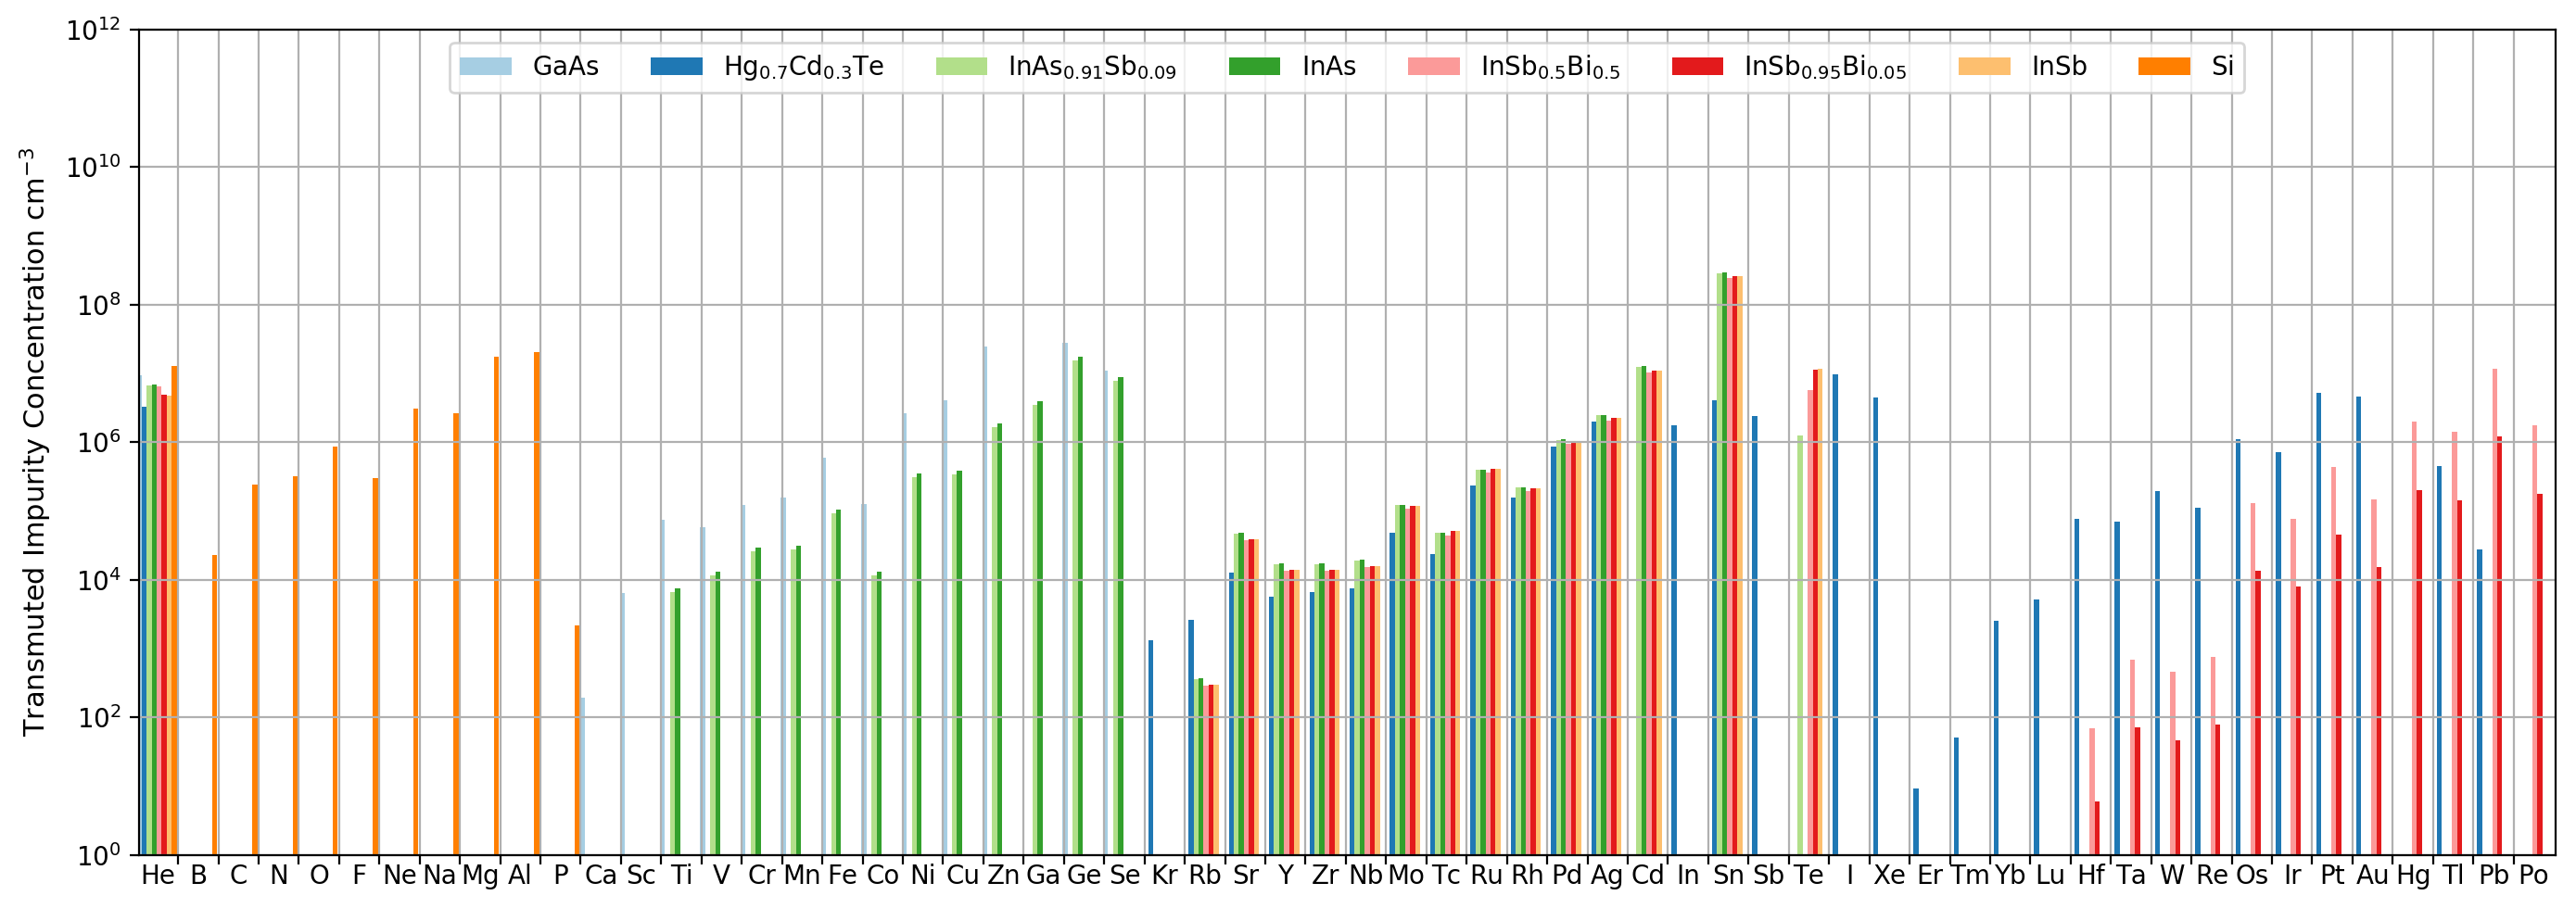

In [5]:


# Make a nice python plot of geant4 results
nice_semiconductor_names = numpy.array(['$GaAs$' , '$Hg_{0.7}Cd_{0.3}Te$' , '$InAs_{0.91}Sb_{0.09}$' , '$InAs$' , '$InSb_{0.5}Bi_{0.5}$' , '$InSb_{0.95}Bi_{0.05}$' ,'InSb', '$Si$'])
col_names_sortedForPlot = ['runFile_GaAs.out', 'runFile_HgCdTe.out', 'runFile_InAsSb.out','runFile_InAs.out', 'runFile_InSbBi_5Bi.out',  'runFile_InSbBi_05Bi.out','runFile_InSb.out', 'runFile_Si.out']

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Setting the positions and width for the bars
pos = list(range(len(elements_from_sorted))) 
width = (1.0/8.0)
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(14,5),dpi=200)
# Create a bar with $InAs_{0.91}Sb_{0.09}$ data,
# in position pos,


for num, semi in enumerate(col_names_sortedForPlot):
    print(semi, sum(dataframe_forPlotting[semi])/10**8)
    plt.bar([p + (num)*width for p in pos], 
            (dataframe_forPlotting[semi]), 
            # of width
            width, 
            # with alpha 0.5
            #alpha=0.5, 
            # with color
            color=colors[num], 
            # with label the first value in element
            label=elements_from_sorted)

# Set the y axis label
ax.set_ylabel('Transmuted Impurity Concentration $cm^{-3}$',size=11)
ax.set_xlabel('')

# Set the position of the x ticks
ax.set_xticks([p - (1.0/4.0)*width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(elements_from_sorted)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos), max(pos)+ width*8)
plt.ylim([1, 10**12] )

legend = nice_semiconductor_names
params = {'mathtext.default': 'regular' } 

plt.rcParams.update(params)

# Adding the legend and showing the plot
plt.legend(legend, loc='upper center',ncol=8)
plt.grid()

ax.yaxis.offsetText.set_visible(False)

labels = elements_from_sorted
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
mticks = ax.get_xticks()

a = numpy.array((mticks[:-1]+mticks[1:])/2)
a = numpy.append(a, (a[len(a)-1] + (-a[len(a)-2]+a[len(a)-1])))

ax.set_xticks(a, minor=True)
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xticklabels(labels, minor=True)

matplotlib.pyplot.yscale('log') #, nonposy='clip')

'''
matplotlib.pyplot.subplots_adjust(bottom=.55)
txt = 'Source:'            
matplotlib.pyplot.figtext(0.03,0.0001, txt, va="bottom", ha="center", fontsize=12,fontweight='bold')
txt = '                      Si                      '       
t = matplotlib.pyplot.figtext(0.168,0.0001, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
txt = '                   Ga&As                   '
t = matplotlib.pyplot.figtext(0.39,0.0001, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
txt = '               Cd&In               '
t = matplotlib.pyplot.figtext(0.59,0.0001, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
txt = '        Sb&Te        '
t = matplotlib.pyplot.figtext(0.725,0.0001, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
txt = '                  Hg&Bi                  '
t = matplotlib.pyplot.figtext(0.886,0.0001, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
'''


fig.tight_layout()
plt.show()

# note that the concentrations of lower mass Bi products in InSbBi are from proton induced fission
# this cross-section is not in the cross-section libraryies included in the FISPACT code so their
# existance is not predicted

In [6]:
# GET IMPURITY CONCENTRATION AT TIME:
# 11 == 10 years
time_get_concentrations = times_y[11]
normalize = 10**8

composition_pivot_column_semi
composition_pivot_column_semi_timeT = composition_pivot_column_semi[composition_pivot_column_semi['Time_Years'] == time_get_concentrations]
elements = composition_pivot_column_semi_timeT['Element']
col_names = composition_pivot_column_semi_timeT.columns[2:10]
final_counts_by_material_timeT = numpy.zeros([composition_pivot_column_semi_timeT.shape[0],8])


for materialNum, column in enumerate(col_names):
    row_count = numpy.array(composition_pivot_column_semi_timeT[column])
    material_name = column.lower()
    for elemNum, symbol in enumerate(elements):
        element_symbol = symbol.lower()
        if (((element_symbol in material_name[7:]) and (len(element_symbol) > 1)) or (element_symbol == 'h')):
            row_count[elemNum] = 0
    final_counts_by_material_timeT[:,materialNum] = row_count
    print(prefix, column, sum(row_count)/normalize)
    


('/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/FINAL_FINAL_ALL_FISPACT_OUTPUT/ALL_LEOISS_Results/', 'runFile_GaAs.out', 0.8042490683135)
('/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/FINAL_FINAL_ALL_FISPACT_OUTPUT/ALL_LEOISS_Results/', 'runFile_HgCdTe.out', 0.41749717735869996)
('/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/FINAL_FINAL_ALL_FISPACT_OUTPUT/ALL_LEOISS_Results/', 'runFile_InAs.out', 3.5058217746816003)
('/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/FINAL_FINAL_ALL_FISPACT_OUTPUT/ALL_LEOISS_Results/', 'runFile_InAsSb.out', 3.436371851312299)
('/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/FINAL_FINAL_ALL_FISPACT_OUTPUT/ALL_LEOISS_Results/', 'runFile_InSb.out', 2.9218086706433004)
('/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/FINAL_FINAL_ALL_FISPACT_OUTPUT/ALL_LEOISS_Results/', 'runFile_InSbBi_05Bi.out', 2.9217834260937985)
('/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/FINAL_FINAL_ALL_FISPACT_OUTPUT/ALL_LEOISS_Results/', 'runFile_InSbBi_5Bi.out', 2.8695976053595995)
('/Use